# Fuzzy Cognitive Maps - Health Scenario

For this notebook the python package `fcmpy` is used.

## Simulation

* Graph nodes denote concepts or variables that describe the problem
* Graph edges represent (casual) relationships between concepts, which are characterized by positive or negative weights
* Weights can take values in the `[-1, 1]` interval so that they represent both the direction and the intensity of causal relationshipts

**Concepts**

Sleep Quality (SQ) – Represents how well and consistently a person sleeps.

Stress Levels (SL) – Represents emotional and physiological stress.

Mental Health (MH) – Represents overall psychological well-being.


**Relationships**

SQ ⟶ (-) SL: Better sleep reduces stress (negative relationship).

SL ⟶ (-) MH: Higher stress negatively impacts mental health (negative relationship).

MH ⟶ (+) SQ: Better mental health leads to better sleep quality (positive relationship).


![FCM Health Visualization](image/FCM_Health.png)

Here we load the necessary packages and functions

In [67]:
from fcmpy import FcmSimulator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The shown edges in the images, are stored as a `weight_matrix`.

In [68]:
weight_matrix = pd.DataFrame(np.array([[0, -1, 0],[0,0,-1], [1,0,0]]),
                             columns=['SQ', 'SL', 'MH'])
weight_matrix

,SQ,SL,MH
0,0,-1,0
1,0,0,-1
2,1,0,0


In our example we want simulate what happens **if**:
* we have **medium** amount of sleep quality, which will be represented as **0.5**
* we have **high** amount of stress, which will be represented as **0.9**
* we have a **moderate** mental health state, which will be represented as **0.75**

In [69]:
init_state = {'SQ': 0.5,'SL': 0.9,"MH": 0.75}

Initalise the simulation function `FcmSimulator` from `fcmpy`.

In [70]:
sim = FcmSimulator()

### Different Activation functions

**Sigmoid** <br>
In our first scenario the simulation is done with the `sigmoid` activation function. The values converge after 9 iterations, which indicates a stable pattern (equilibrium).

**TanH** <br>
In the second scenario the simulation is done with the `tanh` activation function.

In [71]:
res_sigmoid = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 9 state (e <= 0.001)


In [72]:
res_hyperbolic = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='tanh',
                           inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 11 state (e <= 0.001)


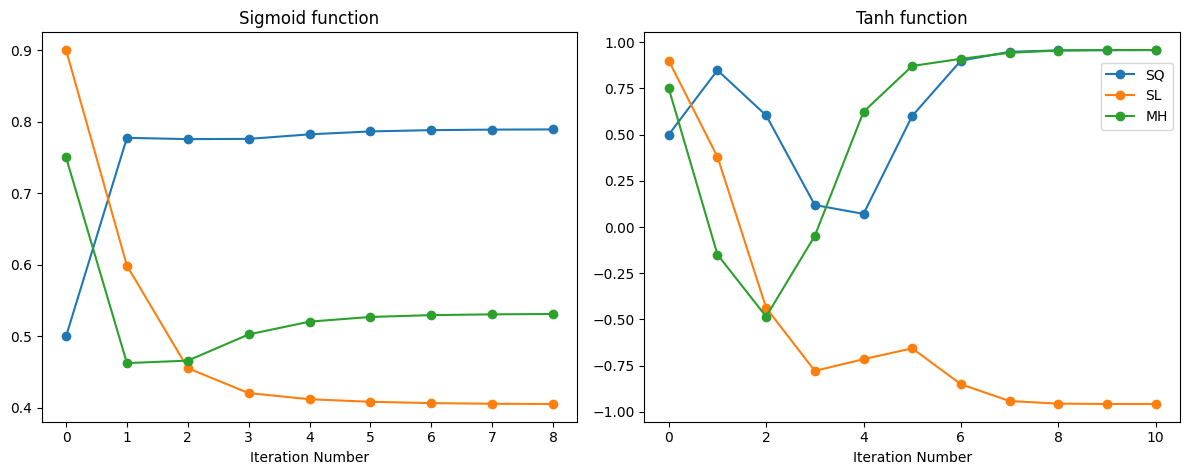

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_sigmoid.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Sigmoid function")  # Individual title for left plot

res_hyperbolic.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("Tanh function")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()


## Intervention

Here we take a look at possible interventions

In [74]:
from fcmpy import FcmIntervention

In [75]:
inter = FcmIntervention(FcmSimulator)

In [76]:
inter.initialize(initial_state=init_state, weight_matrix=weight_matrix,transfer="tanh", inference="mKosko",thresh=0.001, iterations=50, l=1)

The values converged in the 11 state (e <= 0.001)


In [77]:
inter.test_results["baseline"]

,SQ,SL,MH
0,0.500000,0.900000,0.750000
1,0.848284,0.379949,-0.148885
2,0.603986,-0.436853,-0.484489
3,0.118931,-0.778219,-0.047601
4,0.071210,-0.714907,0.623444
5,0.600963,-0.656204,0.871276
6,0.900004,-0.850281,0.909992
7,0.947831,-0.941408,0.942534
8,0.955405,-0.955307,0.954841
9,0.957106,-0.957145,0.957098


Here we add an interventen, where the stress level goes down because of regular physical activity.

In [78]:
inter.add_intervention("Intervention_PhysicalActivity", type="continuous", impact={"SL":-0.3}, effectiveness=1)

In [79]:
inter.test_intervention("Intervention_PhysicalActivity", iterations=5)

The values converged in the 4 state (e <= 0.001)


In [80]:
intervention_hunter = inter.test_results["Intervention_PhysicalActivity"][["SQ", "SL", "MH"]]

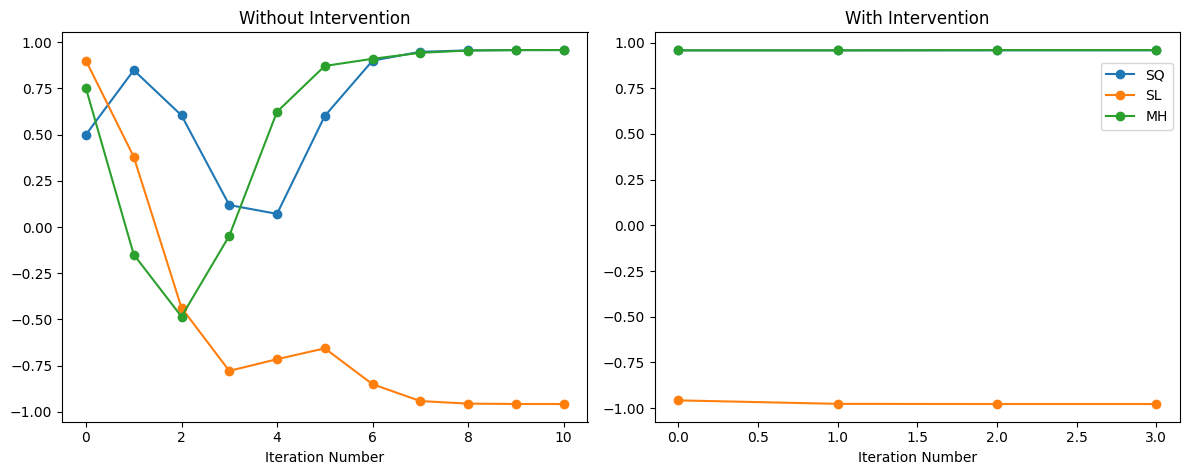

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_hyperbolic.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Without Intervention")  # Individual title for left plot

intervention_hunter.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("With Intervention")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()
